<h1><center>Titanic Classification</center></h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

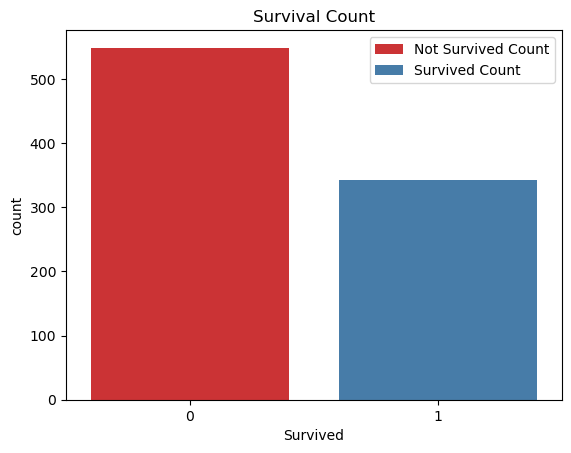

In [6]:
sns.countplot(data=df, x='Survived', palette='Set1', hue='Survived')
plt.title('Survival Count')
plt.legend(['Not Survived Count', 'Survived Count'])
plt.show()

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [8]:
df.drop('Cabin', axis=1, inplace=True)

In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [10]:
#Feature Engineering 👇

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

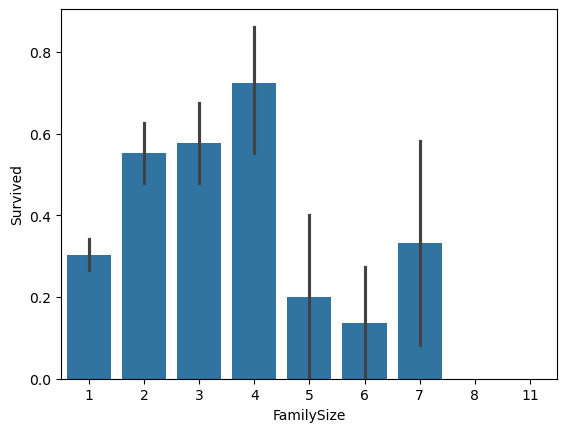

In [11]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.show()

In [12]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [13]:
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [14]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

In [15]:
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

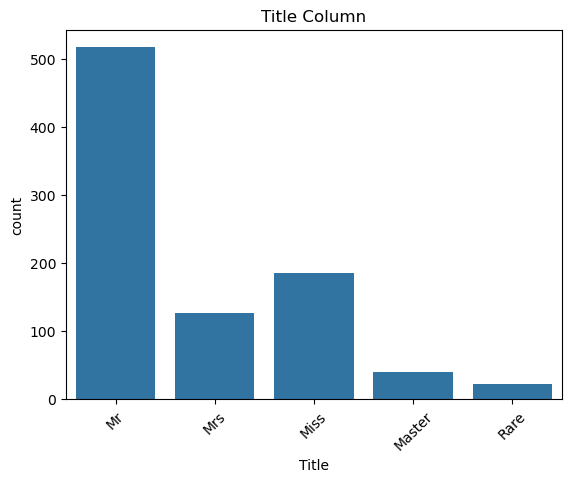

In [16]:
sns.countplot(x='Title', data=df)
plt.xticks(rotation=45)
plt.title('Title Column')
plt.show()

In [17]:
df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

In [18]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
y_test.value_counts(normalize=True)

Survived
0    0.586592
1    0.413408
Name: proportion, dtype: float64

## Logistic Regression

In [21]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred = model.predict(X_test_scaled)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy Score: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       105
           1       0.73      0.78      0.76        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



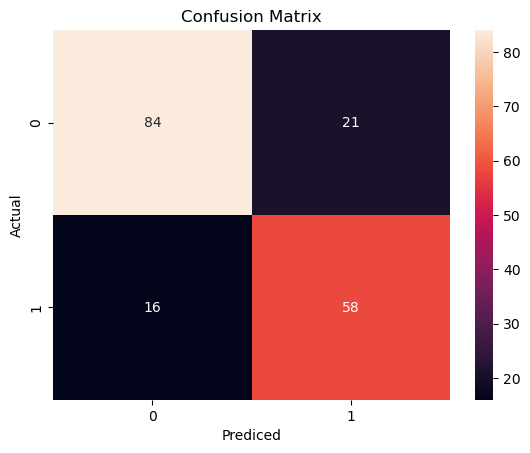

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediced')
plt.ylabel('Actual')
plt.show()

In [24]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print('Cross Validation Score:', cv_scores)
print('Average Score:', cv_scores.mean())

Cross Validation Score: [0.81818182 0.8041958  0.78169014 0.78169014 0.78873239]
Average Score: 0.7948980596867921


In [25]:
y_prob = model.predict_proba(X_test_scaled)[:, -1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('roc_auc curve score:', roc_auc)

roc_auc curve score: 0.8862290862290862


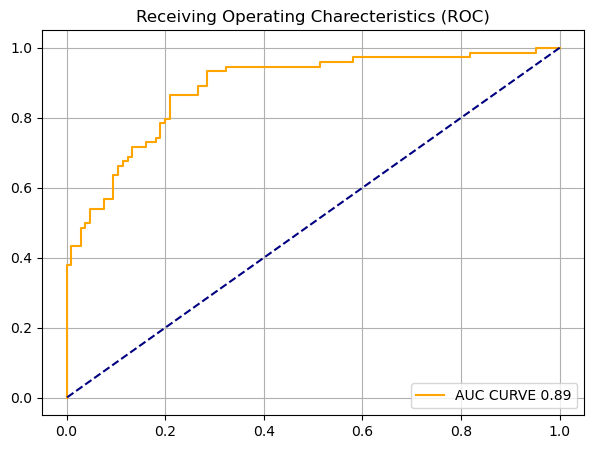

In [26]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='orange', label=f"AUC CURVE {roc_auc:.2f}")
plt.plot([1, 0], [1, 0], linestyle='--', color='navy')
plt.title('Receiving Operating Charecteristics (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Random Forest Classification

In [27]:
model_rf = RandomForestClassifier(class_weight='balanced')
model_rf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred_rf = model_rf.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

Accuracy: 0.8379888268156425


In [29]:
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.79      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179



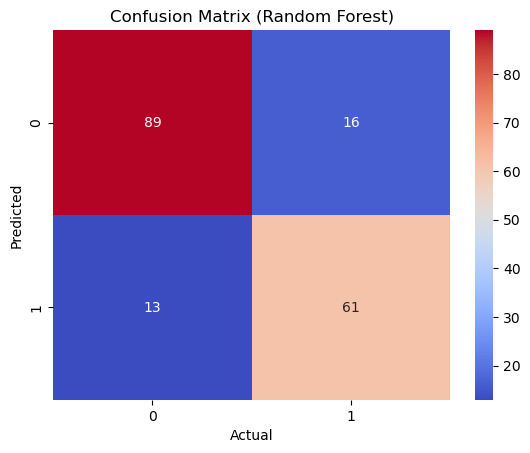

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [31]:
cv_scores_rf = cross_val_score(model_rf, X_train_scaled, y_train, cv=5)
print('Average CV score:', cv_scores_rf.mean())

Average CV score: 0.7879346006106569


In [32]:
y_prob_rf = model_rf.predict_proba(X_test_scaled)[:, -1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_rf)
roc_auc_rf= auc(fpr, tpr)
print('roc curve:', roc_auc_rf)

roc curve: 0.9103603603603604


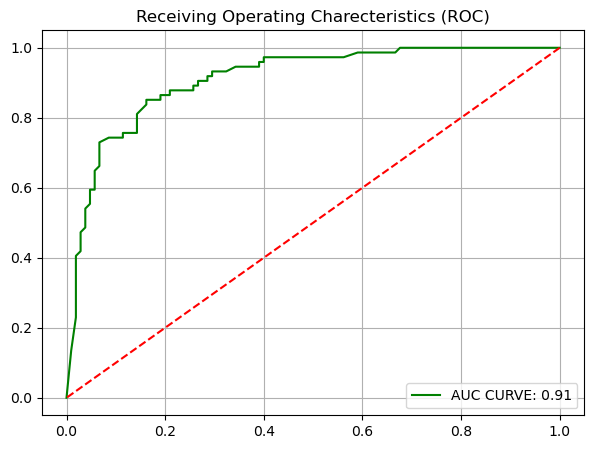

In [33]:
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='green', label=f"AUC CURVE: {roc_auc_rf:.2f}")
plt.plot([1, 0], [1, 0], linestyle='--', color='red')
plt.title('Receiving Operating Charecteristics (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<h1><center>New Data</center></h1>

In [34]:
new_passenger = np.array([[3, 1, 25, 0, 0, 7.25, 0]])
new_passenger_scaled = scaler.transform(new_passenger)
prediction = model.predict(new_passenger_scaled)
print('Using LogisticRegression --')
print('Survived' if prediction[0] == 1 else 'Did not survive')
prediction = model_rf.predict(new_passenger_scaled)
print('\nUsing RandomForestClassifier --')
print('Survived' if prediction[0] == 1 else 'Did not survive')

Using LogisticRegression --
Did not survive

Using RandomForestClassifier --
Did not survive


C:\Users\ASUS CORE I5\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
